<a href="https://colab.research.google.com/github/brenosyperrek/python_pandas/blob/main/Criando_Agrupamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Análise 7

## Criando Agrupamentos

In [22]:
import pandas as pd

In [23]:
dados = pd.read_csv('dados_residencial.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [24]:
dados['Valor'].mean()

5046.172821405663

In [25]:
bairros = ['Copacabana', 'Ipanema', 'Botafogo']
filtro = dados['Bairro'].isin(bairros)
dados = dados[filtro]
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
19,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,56.00,Apartamento


In [26]:
grupo_bairro = dados.groupby('Bairro')
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [27]:
grupo_bairro.groups

{'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 2197, 2242, 2247, 2297, 2352, 2381, 2396, 2413, 2431, 2433, 2470, 2509, 2519, 2532, 2580, ...], 'Copacabana': [0, 9, 10, 11, 24, 25, 28, 31, 86, 91, 104, 109, 125, 129, 140, 142, 143, 151, 162, 174, 184, 192, 194, 206, 223, 249, 263, 275, 278, 281, 289, 290, 301, 307, 319, 327, 329, 348, 359, 365, 371, 372, 388, 396, 404, 425, 426, 437, 458, 460, 485, 486, 487, 497, 530, 532, 534, 557, 564, 573, 574, 583, 606, 610, 612, 615, 633, 650, 659, 666, 667, 678, 687, 689, 694, 701, 713, 730, 736, 739, 772, 808, 82

In [28]:
for bairro, data in grupo_bairro:
  print('{} -> {}'.format(bairro, data['Valor'].mean().round(2)))

Botafogo -> 8791.83
Copacabana -> 4126.68
Ipanema -> 9352.0


In [29]:
grupo_bairro['Valor'].mean()

Bairro
Botafogo      8791.828179
Copacabana    4126.677005
Ipanema       9352.001134
Name: Valor, dtype: float64

In [30]:
grupo_bairro['Valor', 'Condominio'].mean().round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Valor,Condominio
Bairro,,
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Ipanema,9352.00,2244.44


## Estatística Descritiva

In [31]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0


In [33]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min':'Mínimo','max':'Máximo','sum':'Soma'})

,Mínimo,Máximo,Soma
Bairro,,,
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Ipanema,1200.0,90000.0,16496930.0


In [36]:
import matplotlib.pyplot as plt

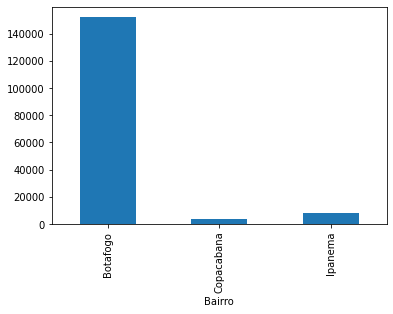

In [38]:
grupo_bairro['Valor'].std().plot.bar()

Text(0.5, 1.0, 'Valor médio do Aluguel por Bairro')

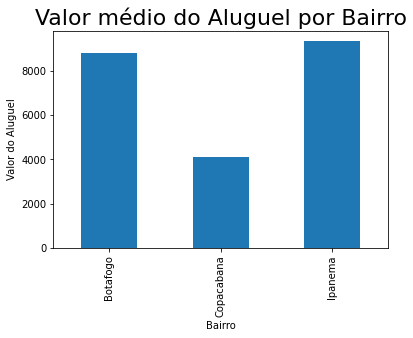

In [40]:
fig = grupo_bairro['Valor'].mean().plot.bar()
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio do Aluguel por Bairro', {'fontsize':22})